In [118]:
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
import pandas_datareader as pdweb
from pandas_datareader import DataReader
import matplotlib.dates as mdates
# For time stamps
from datetime import datetime

# For division
from __future__ import division

In [41]:
tech_list = ['AAPL','GOOG','MSFT','AMZN'] # Grabbing these stocks by their tickers

In [42]:
end = datetime.now() # Ending graph now

start = datetime(end.year-1,end.month,end.day) # Start date one year earlier from today

In [43]:
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end) # Grabbing stock data, and making strings into global
                                                                    # variables

In [44]:
AAPL # Globals turns the stock string into a DataFrame 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-29,81.962502,80.345001,81.112503,81.084999,216229200.0,80.390747
2020-01-30,81.022499,79.687500,80.135002,80.967499,126743200.0,80.274246
2020-01-31,80.669998,77.072502,80.232498,77.377502,199588400.0,76.714989
2020-02-03,78.372498,75.555000,76.074997,77.165001,173985600.0,76.504311
2020-02-04,79.910004,78.407501,78.827499,79.712502,136616400.0,79.029999
...,...,...,...,...,...,...
2021-01-25,145.089996,136.539993,143.070007,142.919998,157611700.0,142.919998
2021-01-26,144.300003,141.369995,143.600006,143.160004,98390600.0,143.160004
2021-01-27,144.300003,140.410004,143.429993,142.059998,140843800.0,142.059998


In [45]:
GOOG.head() # Different stocks data preview

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-29,1465.430054,1446.739990,1458.800049,1458.630005,1077700,1458.630005
2020-01-30,1457.280029,1436.400024,1439.959961,1455.839966,1339400,1455.839966
2020-01-31,1470.130005,1428.530029,1468.900024,1434.229980,2417200,1434.229980
2020-02-03,1490.000000,1458.989990,1462.000000,1485.939941,3036800,1485.939941
2020-02-04,1469.500000,1426.300049,1457.069946,1447.069946,3933000,1447.069946


In [46]:
#AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,100.847244,97.894784,99.368002,99.423858,1.559595e+08,99.168906
std,23.601202,23.068496,23.501250,23.319433,7.051884e+07,23.462803
min,57.125000,53.152500,57.020000,56.092499,4.669130e+07,55.744217
25%,79.887499,78.257502,78.865622,78.860003,1.057862e+08,78.582495
50%,99.602501,96.672501,99.081249,98.041248,1.374016e+08,97.696251
75%,120.269999,116.809998,118.700001,118.937498,1.870393e+08,118.783758
max,145.089996,141.369995,143.600006,143.160004,4.268848e+08,143.160004


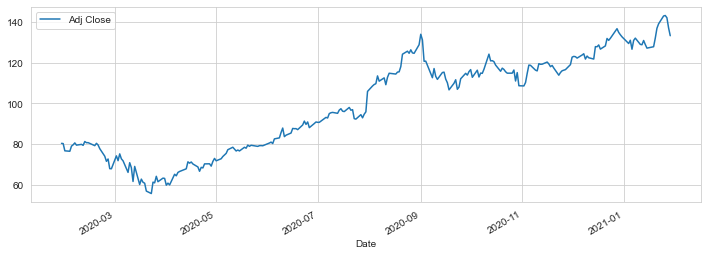

In [49]:
# Still have to figure out how to set the x axis to every month
AAPL['Adj Close'].plot(legend=True,figsize=(12,4)) # Historical analysis of closing price

plt.show()

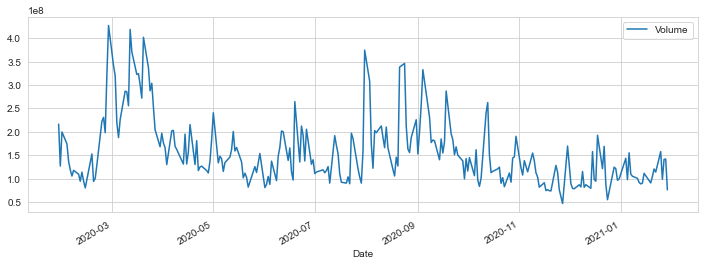

In [50]:
# Still have to figure out how to set the x axis to every month
AAPL['Volume'].plot(legend=True,figsize=(12,4)) # Historical analysis of Volume
plt.show()

In [53]:
# Calculating moving average for apple stock

ma_day = [10,20,50] # creating a list for different moving averages

for ma in ma_day:
    column_name='MA for %s days' %(str(ma))  # creating a string for each column --10,20,50--
    AAPL[column_name]=DataFrame.rolling(AAPL['Adj Close'],ma) # column name equal to the rolling avg of  
                                                                # adj close price for 10,20,50 days


<AxesSubplot:xlabel='Date'>

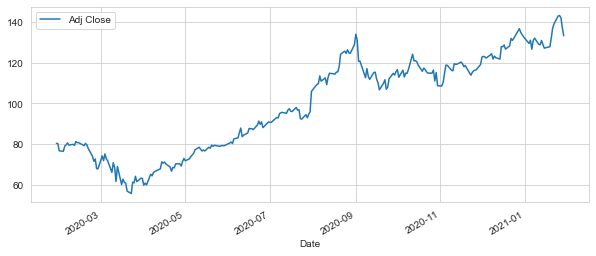

In [57]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

In [60]:
# Calculating moving average for apple stock

ma_day = [10,20,50] # creating a list for different moving averages

for ma in ma_day:
    column_name='MA for %s days' %(str(ma))  # creating a string for each column --10,20,50--
    AAPL[column_name]=AAPL['Adj Close'].rolling(ma).mean() # column name equal to the rolling avg of  
                                                                # adj close price for 10,20,50 days



<AxesSubplot:xlabel='Date'>

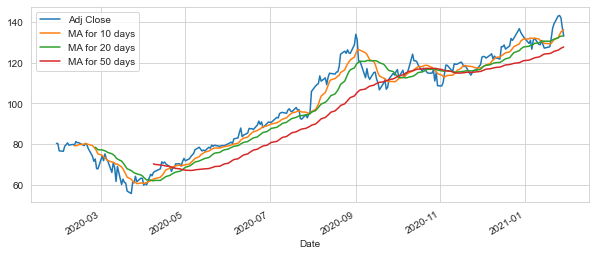

In [64]:
# Plotting moving averages for the newly generated columns via the for loop above
# Moving average is how a price fluctuates over a period of time, in this case adj closing price
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

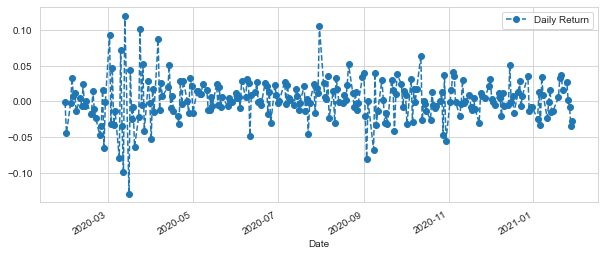

In [65]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change() # creating a new column DR, by calculating pct_change

AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o') # plotting new column

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

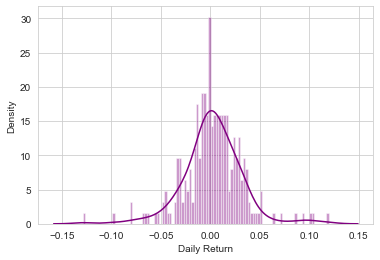

In [66]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple') # plotting daily return

<AxesSubplot:>

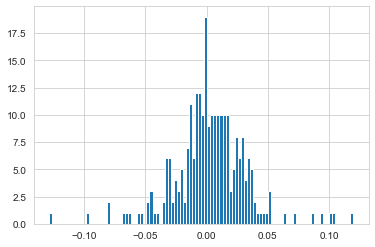

In [67]:
AAPL['Daily Return'].hist(bins=100) # visualizing same column through a histogram

In [69]:
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close'] # creating new DF, taking adj close prices 
                                                                    # for every stock in list

In [70]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-01-29,80.390747,1458.630005,166.278503,1858.000000
2020-01-30,80.274246,1455.839966,170.968826,1870.680054
2020-01-31,76.714989,1434.229980,168.445557,2008.719971
2020-02-03,76.504311,1485.939941,172.552048,2004.199951
2020-02-04,79.029999,1447.069946,178.231873,2049.669922


In [71]:
tech_rets = closing_df.pct_change() # new object showing the daily return for all stocks in list

In [72]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-01-29,NaN,NaN,NaN,NaN
2020-01-30,-0.001449,-0.001913,0.028208,0.006825
2020-01-31,-0.044339,-0.014844,-0.014759,0.073791
2020-02-03,-0.002746,0.036054,0.024379,-0.002250
2020-02-04,0.033014,-0.026159,0.032917,0.022687


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


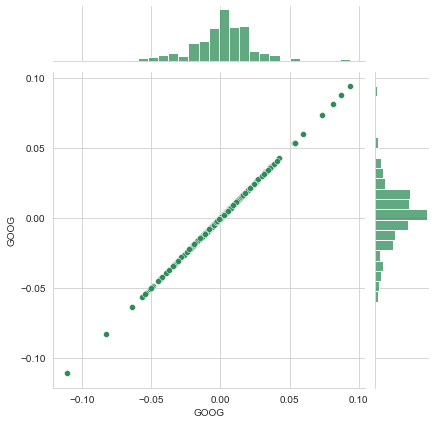

In [78]:
import scipy.stats as stats
# how to show pearson value?
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')# Using a scatterplot 
                                                                        #to visualize correlation

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


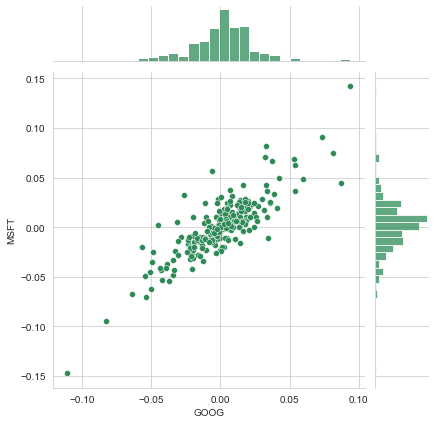

In [80]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter',color='seagreen')
plt.show()

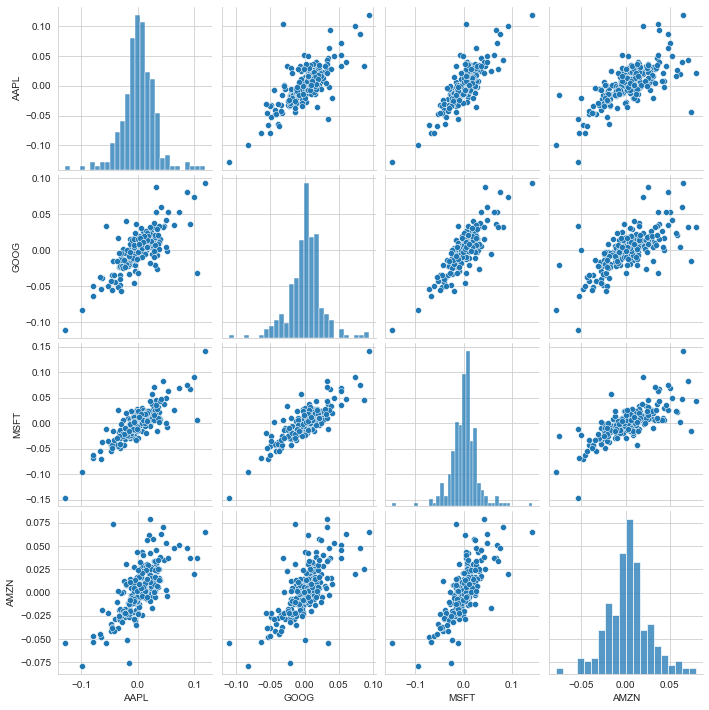

In [81]:
sns.pairplot(tech_rets.dropna())  # creating a pairplot resembling all relationships return-wise for all stocks

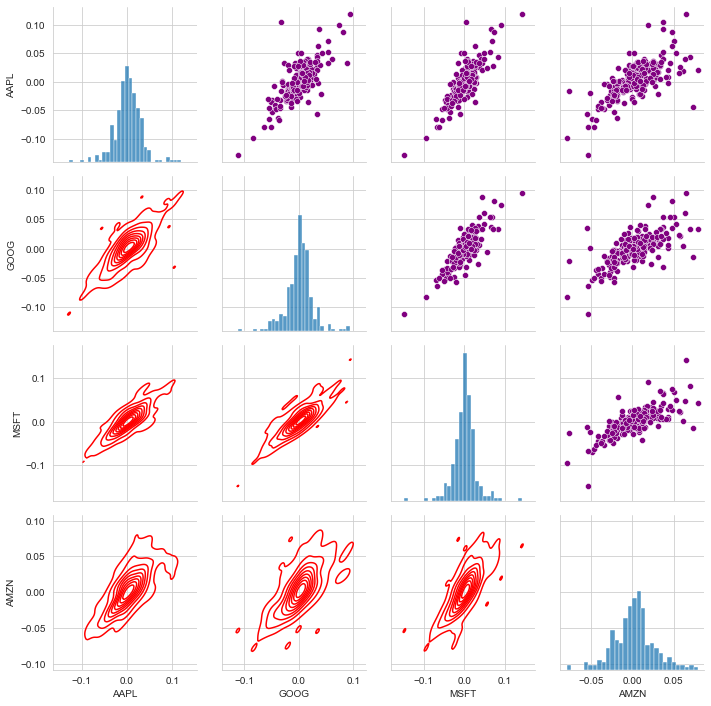

In [91]:
returns_fig = sns.PairGrid(tech_rets.dropna()) # creating object PairGrid

returns_fig.map_upper(sns.scatterplot,color='purple') # manually setting upper triangle for a scatter

returns_fig.map_lower(sns.kdeplot,color='red') # lower for a KDE plot

returns_fig.map_diag(sns.histplot,bins=30) # diagonal for a histogram showing daily returns

# full control of what your PairGrid should show

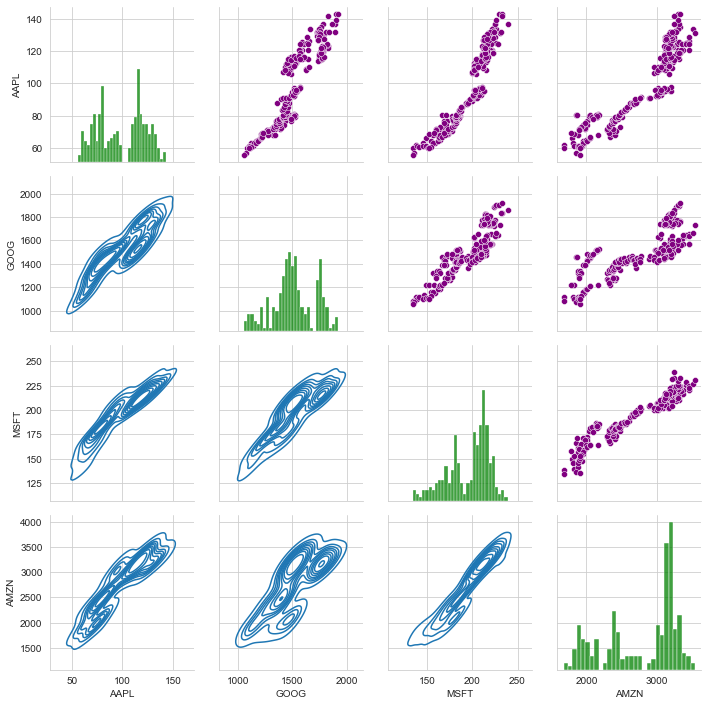

In [94]:
# Doing the same for the correlation of the closing prices
returns_fig = sns.PairGrid(closing_df.dropna()) # creating object PairGrid

returns_fig.map_upper(sns.scatterplot,color='purple') # manually setting upper triangle for a scatter

returns_fig.map_lower(sns.kdeplot) # lower for a KDE plot

returns_fig.map_diag(sns.histplot,bins=30,color='green') # diagonal for a histogram showing daily returns

# full control of what your PairGrid should show

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

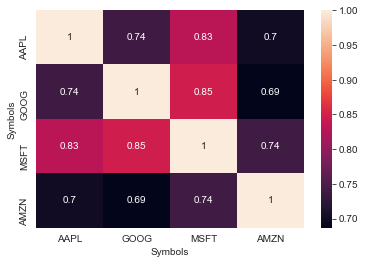

In [105]:
tech_rets_corr = tech_rets.dropna().corr()  # manually creating a corrplot by calculating corr of daily return
                                            #in a new object

sns.heatmap(tech_rets_corr,annot=True)   # put that object in a heatmap

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

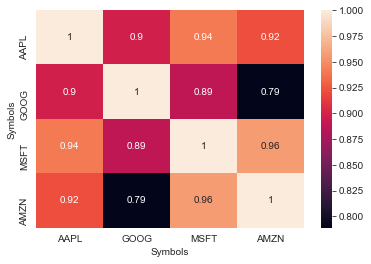

In [106]:
closing_df_corr = closing_df.dropna().corr()  # manually creating a corrplot by calculating closing price
                                              #in a new object

sns.heatmap(closing_df_corr,annot=True)   # put that object in a heatmap

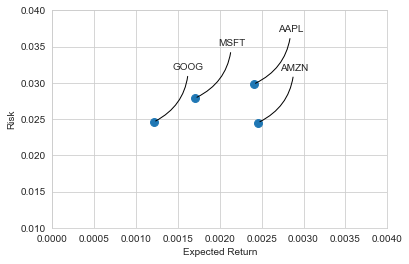

In [114]:
# Analyzing risk of a stock, basic way of doing this is by comparing daily returns with std of daily ret

rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s = area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

plt.ylim([0.01,0.040])
plt.xlim([0,0.004])


# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3',color='black'))
    
    
    # You would want a high expected return, with a low risk --> in this case, amazon would be the way to go!

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

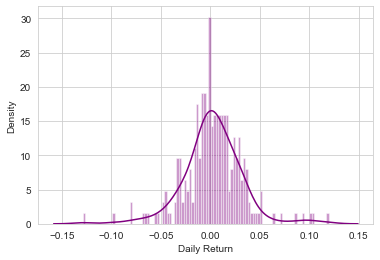

In [115]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [117]:
# The 0.05 empirical quantile of daily returns - with 95% confidence, the worst daily loss wont exceed 4,4%
rets['AAPL'].quantile(0.05)

-0.04480978227807339

In [119]:
rets['GOOG'].quantile(0.05)

-0.04249036721704831

In [120]:
rets['MSFT'].quantile(0.05)

-0.041652731837761636

In [121]:
rets['AMZN'].quantile(0.05)

-0.03694479005576301